<a href="https://colab.research.google.com/github/musa-fe/Machine_Learning_2/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PİSİRME MESAFESİ TAKIMI##



In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/balanced_sample.csv")

In [4]:
df.head()

,timestamp,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,failure_type,downtime_risk,maintenance_required
0,2025-01-28 22:01:00,12,70.52,57.21,41.55,3.20,2.55,2,0,422,Overheating,0.0,1
1,2025-01-18 19:09:00,27,70.47,30.81,56.76,1.16,2.74,2,0,153,Electrical Fault,0.0,1
2,2025-02-11 16:36:00,15,77.40,67.63,56.04,3.97,2.83,2,0,76,Vibration Issue,0.0,1
3,2025-02-25 11:10:00,4,78.15,41.90,49.71,4.36,2.38,1,0,275,Normal,0.0,0
4,2025-03-05 20:21:00,23,61.11,33.66,73.22,3.32,3.17,2,0,15,Electrical Fault,0.0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1172 entries, 0 to 1181
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 1172 non-null   object 
 1   machine_id                1172 non-null   int64  
 2   temperature               1172 non-null   float64
 3   vibration                 1172 non-null   float64
 4   humidity                  1172 non-null   float64
 5   pressure                  1172 non-null   float64
 6   energy_consumption        1172 non-null   float64
 7   machine_status            1172 non-null   int64  
 8   anomaly_flag              1172 non-null   int64  
 9   predicted_remaining_life  1172 non-null   int64  
 10  failure_type              1172 non-null   object 
 11  downtime_risk             1172 non-null   float64
 12  maintenance_required      1172 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 160.5+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
machine_id,1172.0,26.238908,14.200682,1.00,14.0000,26.000,39.0000,50.00
temperature,1172.0,77.228584,11.204123,46.19,69.5825,76.440,85.2200,108.07
vibration,1172.0,50.928174,15.310379,10.45,40.2750,50.235,60.9900,92.10
humidity,1172.0,55.139445,14.450108,30.00,42.9575,54.865,67.4150,79.99
pressure,1172.0,2.975597,1.147417,1.01,1.9300,3.000,3.9725,4.99
energy_consumption,1172.0,2.730290,1.287808,0.51,1.6175,2.720,3.8325,5.00
machine_status,1172.0,1.179181,0.550112,0.00,1.0000,1.000,2.0000,2.00
anomaly_flag,1172.0,0.227816,0.419602,0.00,0.0000,0.000,0.0000,1.00
predicted_remaining_life,1172.0,192.196246,156.026079,1.00,39.7500,165.000,327.0000,499.00
downtime_risk,1172.0,0.227816,0.419602,0.00,0.0000,0.000,0.0000,1.00


In [23]:
df.shape

(1172, 13)

# Bagimli Degiskenimizi inceleyelim

<Axes: ylabel='maintenance_required'>

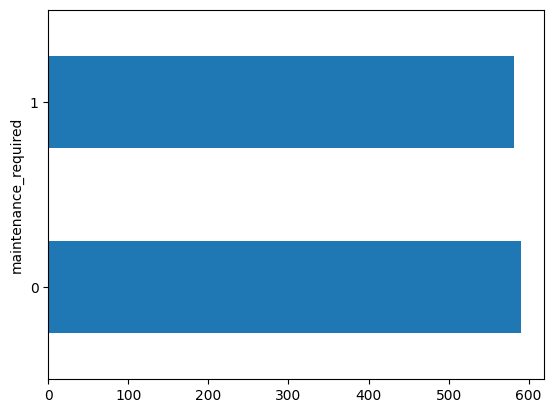

In [24]:
df["maintenance_required"].value_counts().plot.barh()

Bağımlı değişkenimizi, eşit dağılım göstermiş. Bu istenilen bir durum

#OBJECT türünde olan sütunlarımızı düzenleyelim

In [25]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df.timestamp.head()

,timestamp
0,2025-01-28 22:01:00
1,2025-01-18 19:09:00
2,2025-02-11 16:36:00
3,2025-02-25 11:10:00
4,2025-03-05 20:21:00


#Kategorik veriler icin "One Hot Encoding" yapalım

In [26]:
df["failure_type"].unique()

array(['Overheating', 'Electrical Fault', 'Vibration Issue', 'Normal',
       'Pressure Drop'], dtype=object)

In [27]:
df = pd.get_dummies(df, columns=['failure_type'], prefix='failure')
df[df.filter(like='failure_').columns] = df.filter(like='failure_').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1172 entries, 0 to 1181
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 1172 non-null   datetime64[ns]
 1   machine_id                1172 non-null   int64         
 2   temperature               1172 non-null   float64       
 3   vibration                 1172 non-null   float64       
 4   humidity                  1172 non-null   float64       
 5   pressure                  1172 non-null   float64       
 6   energy_consumption        1172 non-null   float64       
 7   machine_status            1172 non-null   int64         
 8   anomaly_flag              1172 non-null   int64         
 9   predicted_remaining_life  1172 non-null   int64         
 10  downtime_risk             1172 non-null   float64       
 11  maintenance_required      1172 non-null   int64         
 12  failure_Electrical Fault 

# Eksik verimiz var mı

In [28]:
df.isnull().sum().sum()

np.int64(0)

# Tekrarlanan verimiz var mı

In [29]:
df.duplicated().sum()

np.int64(0)

# Hedef degiskenimiz dengeli mi

In [30]:
df['maintenance_required'].value_counts(normalize=True) * 100

,proportion
maintenance_required,
0,50.341297
1,49.658703


# Aykırı değerlerimiz var mı

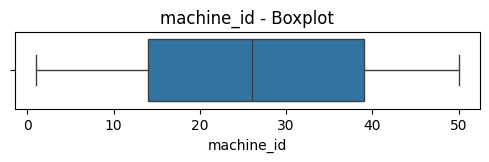

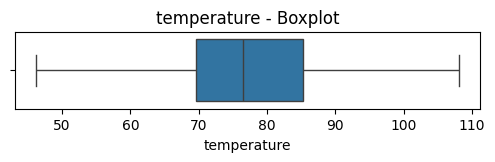

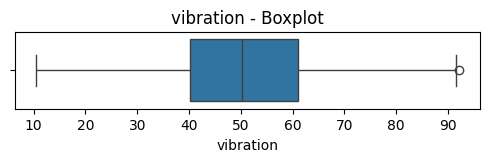

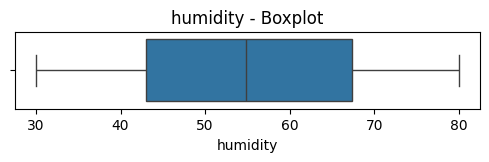

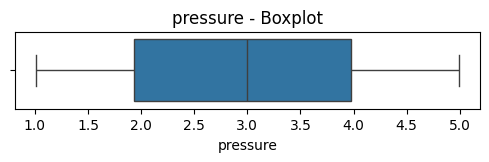

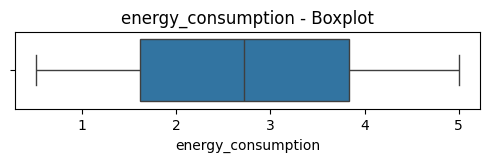

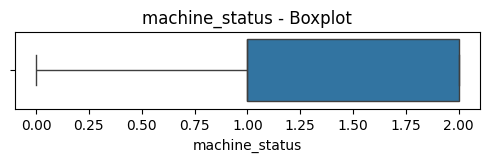

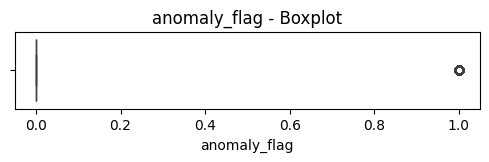

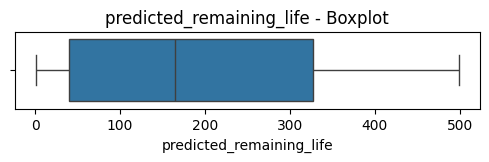

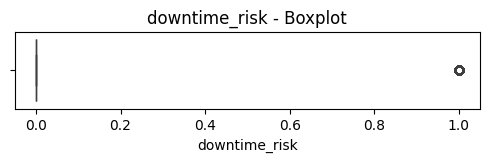

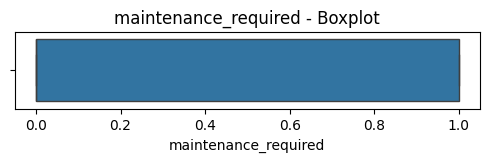

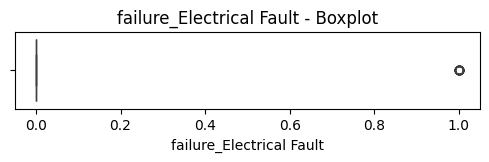

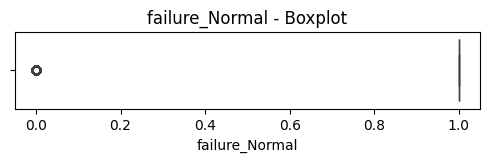

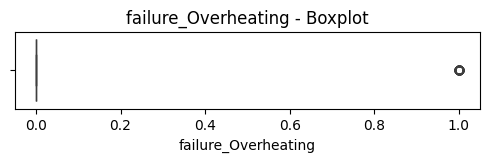

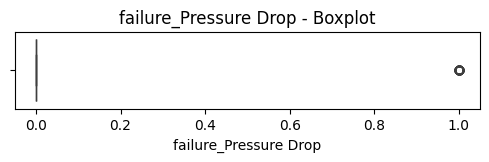

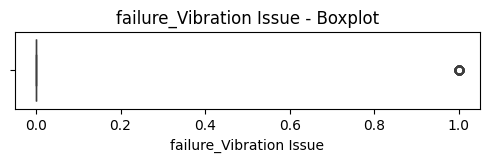

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
    plt.show()

vibration sütunumuzda aykırı gözlem gozukuyor bunlardan kurtulmalıyız

In [32]:
Q1 = df['vibration'].quantile(0.25)
Q3 = df['vibration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['vibration'] < lower_bound) | (df['vibration'] > upper_bound)]

print("Aykırı sayısı:", len(outliers))

print("Aykırı oranı: {:.2f}%".format(len(outliers) / len(df) * 100))

Aykırı sayısı: 1
Aykırı oranı: 0.09%


Aykırı değer oranımız çok küçük direkt veriden silebiliriz

In [33]:
Q1 = df['vibration'].quantile(0.25)
Q3 = df['vibration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['vibration'] >= lower_bound) & (df['vibration'] <= upper_bound)]

print("Yeni veri seti satır sayısı:", len(df))

Yeni veri seti satır sayısı: 1171


In [34]:
df.head()

,timestamp,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,downtime_risk,maintenance_required,failure_Electrical Fault,failure_Normal,failure_Overheating,failure_Pressure Drop,failure_Vibration Issue
0,2025-01-28 22:01:00,12,70.52,57.21,41.55,3.20,2.55,2,0,422,0.0,1,0,0,1,0,0
1,2025-01-18 19:09:00,27,70.47,30.81,56.76,1.16,2.74,2,0,153,0.0,1,1,0,0,0,0
2,2025-02-11 16:36:00,15,77.40,67.63,56.04,3.97,2.83,2,0,76,0.0,1,0,0,0,0,1
3,2025-02-25 11:10:00,4,78.15,41.90,49.71,4.36,2.38,1,0,275,0.0,0,0,1,0,0,0
4,2025-03-05 20:21:00,23,61.11,33.66,73.22,3.32,3.17,2,0,15,0.0,1,1,0,0,0,0


# Degiskenler arasında yuksek korelasyon var mı

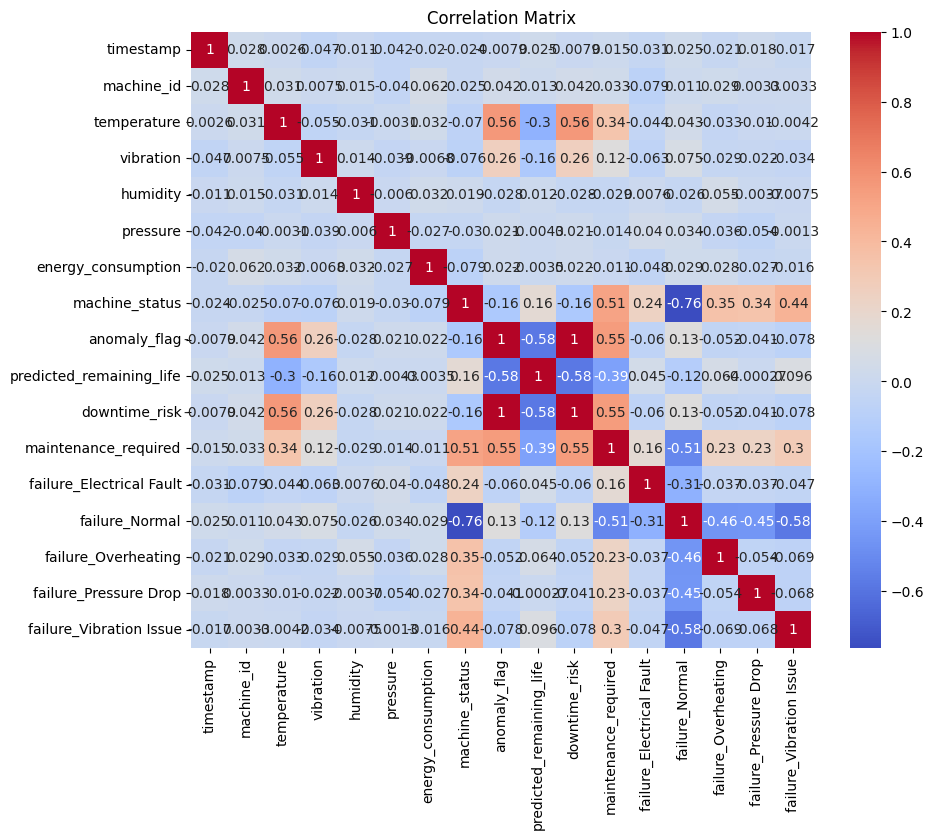

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Sızıntı Yaratabilecek Degiskenler Var mı


In [36]:
corr_target = corr['maintenance_required'].sort_values(ascending=False)
print(corr_target)

maintenance_required        1.000000
downtime_risk               0.546329
anomaly_flag                0.546329
machine_status              0.511717
temperature                 0.337069
failure_Vibration Issue     0.297710
failure_Overheating         0.234184
failure_Pressure Drop       0.232119
failure_Electrical Fault    0.160585
vibration                   0.120977
machine_id                  0.033024
timestamp                   0.015463
energy_consumption         -0.011054
pressure                   -0.013584
humidity                   -0.028637
predicted_remaining_life   -0.391276
failure_Normal             -0.514325
Name: maintenance_required, dtype: float64


Burada one hot encoding uyguladığımız için failure kısımlarının korelasyonu 1 çıkmıyor. Ama yanıt değişkenini yüzde yüz açıkladığı için veri sızıntısı oluşturuyor. Model kurarken bu değerleri de atacağız.

#Modeli kuralım

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

x_full = df.drop(columns=['maintenance_required', 'timestamp'])
y = df['maintenance_required']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_full)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
print("Tüm sütunlarla:")
print(classification_report(y_test, model.predict(x_test)))

Tüm sütunlarla:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       118
           1       1.00      0.91      0.96       117

    accuracy                           0.96       235
   macro avg       0.96      0.96      0.96       235
weighted avg       0.96      0.96      0.96       235



downtime_risk, anomaly_flag, predicted_remaining_life gibi sızıntı riski yüksek sütunları çıkarıp tekrar modeli eğitelim. Veri sızıntısı var gibi

In [39]:
leak_columns = ['anomaly_flag', 'predicted_remaining_life']
X_filtered = df.drop(columns=leak_columns + ['maintenance_required', 'timestamp'])
y = df['maintenance_required']

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       118
           1       1.00      0.90      0.95       117

    accuracy                           0.95       235
   macro avg       0.95      0.95      0.95       235
weighted avg       0.95      0.95      0.95       235



Aynı modeli K-Fold Cross Validation ile test edelim

In [40]:
from sklearn.model_selection import cross_val_score

# Sızıntı riski olan sütunları çıkarıyoruz
leak_columns = ['downtime_risk', 'anomaly_flag', 'predicted_remaining_life']
X_filtered = df.drop(columns=leak_columns + ['maintenance_required', 'timestamp'])
y = df['maintenance_required']

model = LogisticRegression(max_iter=1000, random_state=42)

scores = cross_val_score(model, X_filtered, y, cv=5, scoring='f1')

print("F1 skorları (5 Fold):", scores)
print("Ortalama F1 skoru:", np.mean(scores))

F1 skorları (5 Fold): [0.81777778 0.85201794 0.8362069  0.82758621 0.81308411]
Ortalama F1 skoru: 0.8293345861190634


Veri sızıntısı yaratabilecek tüm değişkenlerimizi atıp tekrar model kuralım

#Yeni modeller kurup nihai verimizi test edelim

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Sızıntı riski taşıyan sütunları çıkaratlım
drop_cols = [
    'downtime_risk',
    'predicted_remaining_life',
    'timestamp',
    'failure_Electrical Fault',
    'failure_Normal',
    'failure_Overheating',
    'failure_Pressure Drop',
    "machine_status",
    'failure_Vibration Issue'
]

X = df.drop(columns=drop_cols + ['maintenance_required'], errors='ignore')
y = df['maintenance_required']

rf_model = RandomForestClassifier(random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

cv_results = cross_validate(rf_model, X, y, cv=skf, scoring=scoring)

for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    print(f"{metric.upper()} - Mean: {scores.mean():.4f} | Std: {scores.std():.4f}")

ACCURACY - Mean: 0.7122 | Std: 0.0297
PRECISION - Mean: 0.8463 | Std: 0.0564
RECALL - Mean: 0.5162 | Std: 0.0530
F1 - Mean: 0.6391 | Std: 0.0438
ROC_AUC - Mean: 0.7106 | Std: 0.0300


Veri sızıntısına sebep olabileceğini düşündüğümüz değişkenleri çıkardıktan sonra, Random forest için F1 İstatistiği ve Accuracy değerlerimiz yukarıdaki gibidir.



Çıkartma Nedenlerimiz:


Downtime risk veya Anomaly flag arasında seçim yapmamız gerekti çünkü multicolinearity'ye sebep oluyordu. Bu iki değişkenin kendi aralarındaki korelasyon 1.


Predicted Remaining Life değişkeni kendi başına başka sensör verilerine bağlı olduğu için çıkartıldı.


Machine status'de  aynı şekilde başka sensör verilerine bağlı olduğundan dolayı çıkartıldı.


failure type değişkeni de aynı şekilde sebebi diğer sensör verilerine bağlı olduğudnan dolayı çıkartıldı.

#Logistic Regresyon Train-Test




Verimiz 1172 satırlık bir veri. CV ile bölmeye uygun ama biz önce train test ile de bölüp f1 ve accuracy değerlerimizi karşılaştıralım

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(solver = "liblinear").fit(X_train, y_train)
predicts = log_model.predict(X_test)

print("accuracy:",accuracy_score(y_test, predicts))
print("F1 Score:",f1_score(y_test,predicts))

accuracy: 0.723404255319149
F1 Score: 0.6012269938650306


# Logistic Regression -CV-

Şimdi CV ile bölebiliriz. 1000 in üstünde satırımız var, 10-fold uygulamalıyız

In [66]:
log_model = LogisticRegression(solver="liblinear")

cv_acc = cross_val_score(log_model, X, y, cv=10, scoring='accuracy')
print("Mean Accuracy:", np.mean(cv_acc))

# F1 skorları
cv_f1 = cross_val_score(log_model, X, y, cv=10, scoring='f1')
print("Mean F1 Score:", np.mean(cv_f1))

Mean Accuracy: 0.7309937708242792
Mean F1 Score: 0.6251216736863294


# K-Nearest Neighbors (KNN) Train-Test


In [68]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)
preds_knn = knn_model.predict(X_test)
accuracy_score(y_test, preds_knn)

0.6297872340425532

Model Optimizasyonu

In [69]:
from sklearn.model_selection import GridSearchCV

knn_params ={"n_neighbors": np.arange(1,40)}
knn_mod = KNeighborsClassifier()

gs_knn = GridSearchCV(knn_mod, knn_params, cv = 10).fit(X_train, y_train)
gs_knn.best_params_

{'n_neighbors': np.int64(38)}

In [72]:
knn_best = KNeighborsClassifier(n_neighbors = 38).fit(X_train, y_train)
best_preds_knn = knn_best.predict(X_test)

print("accuracy:",accuracy_score(best_preds_knn, preds_knn))
print("F1 Score:",f1_score(best_preds_knn, preds_knn))

accuracy: 0.8042553191489362
F1 Score: 0.7195121951219512


# K-Nearest Neighbors (KNN) -CV-


In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

cv_acc = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
print("Mean Accuracy:", np.mean(cv_acc))

cv_f1 = cross_val_score(knn_model, X, y, cv=10, scoring='f1')
print("Mean F1 Score:", np.mean(cv_f1))

Mean Accuracy: 0.6524119947848761
Mean F1 Score: 0.6286462859360056


##Modeli CV ile bölersek nasıl model optimizasyonu yapabiliriz?
